
## Exploratory Data Analysis on Cab Rides

### Problem Statement 

Analyze “Cab Rides 2016 dataset" and try to find the hidden relationships among Time (Date), Miles, Purpose, start and end location, and categories.

### Data Description 
•	START_DATE*: Start date of the ride 
•	END_DATE*: End date of the ride 
•	CATEGORY*: Ride Category 

1.	Business 

2.	Personal 

•	START*: Start location of the ride 
•	STOP*: End location of the ride 
•	MILES*: Travelling distance 
•	PURPOSE*: Ride purpose 

1.	Meal/Entertain 

2.	Temporary Site 

3.	Customer Visit 

4.	Airport/Travel 

5.	Between Offices 

6.	Charity 

7.	Commute 

8.	Errand/Supplies 

9.	Meeting 

10.	Moving

### Expected Outcome 

Following operations on the data frame are expected: 

•	Data Preparation 

•	Missing Value Treatment 

•	Visualization 



In [1]:
## Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [3]:
# pd.set_option("max_columns",500)
# pd.set_option("max_rows",2000)

In [17]:
data = pd.read_csv("Cab_Rides.csv")
data.head(20)

START_DATE*        END_DATE* CATEGORY*             START*  \
0    1/1/2016 21:11   1/1/2016 21:17  Business        Fort Pierce   
1     1/2/2016 1:25    1/2/2016 1:37  Business        Fort Pierce   
2    1/2/2016 20:25   1/2/2016 20:38  Business        Fort Pierce   
3    1/5/2016 17:31   1/5/2016 17:45  Business        Fort Pierce   
4    1/6/2016 14:42   1/6/2016 15:49  Business        Fort Pierce   
5    1/6/2016 17:15   1/6/2016 17:19  Business    West Palm Beach   
6    1/6/2016 17:30   1/6/2016 17:35  Business    West Palm Beach   
7    1/7/2016 13:27   1/7/2016 13:33  Business               Cary   
8    1/10/2016 8:05   1/10/2016 8:25  Business               Cary   
9   1/10/2016 12:17  1/10/2016 12:44  Business            Jamaica   
10  1/10/2016 15:08  1/10/2016 15:51  Business           New York   
11  1/10/2016 18:18  1/10/2016 18:53  Business           Elmhurst   
12  1/10/2016 19:12  1/10/2016 19:32  Business            Midtown   
13   1/11/2016 8:55   1/11/2016 9:21  Business        East Harlem   
14  1/11/2016 11:56  1/11/2016 12:03  Business  Flatiron District   
15  1/11/2016 13:32  1/11/2016 13:46  Business            Midtown   
16  1/11/2016 14:30  1/11/2016 14:43  Business       Midtown East   
17  1/12/2016 12:33  1/12/2016 12:49  Business            Midtown   
18  1/12/2016 12:53  1/12/2016 13:09  Business      Hudson Square   
19  1/12/2016 14:42  1/12/2016 14:56  Business    Lower Manhattan   

              STOP*  MILES*         PURPOSE*  
0       Fort Pierce     5.1   Meal/Entertain  
1       Fort Pierce     5.0              NaN  
2       Fort Pierce     4.8  Errand/Supplies  
3       Fort Pierce     4.7          Meeting  
4   West Palm Beach    63.7   Customer Visit  
5   West Palm Beach     4.3   Meal/Entertain  
6        Palm Beach     7.1          Meeting  
7              Cary     0.8          Meeting  
8       Morrisville     8.3          Meeting  
9          New York    16.5   Customer Visit  
10           Queens    10.8          Meeting  
11         New York     7.5          Meeting  
12      East Harlem     6.2          Meeting  
13            NoMad     6.4   Temporary Site  
14          Midtown     1.6  Errand/Supplies  
15     Midtown East     1.7   Meal/Entertain  
16          Midtown     1.9   Meal/Entertain  
17    Hudson Square     1.9   Meal/Entertain  
18  Lower Manhattan     4.0   Meal/Entertain  
19    Hudson Square     1.8  Errand/Supplies

In [20]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'])
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'])
data['weekday']=data['START_DATE*'].apply(lambda x: x.weekday())
data['month']=data['START_DATE*'].apply(lambda x: x.month)
data['hour']=data['START_DATE*'].apply(lambda x: x.hour)
# data['year']=data['START_DATE*'].apply(lambda x: x.year)

In [34]:
a = data['END_DATE*']-data['START_DATE*']
data['time_taken'] = [i.seconds/60 for i in a]

In [50]:
data.weekday.unique()

array([4, 5, 1, 2, 3, 6, 0], dtype=int64)

In [54]:
data[data['month'] == 2].head(50)

START_DATE*           END_DATE* CATEGORY*            START*  \
61  2016-02-01 10:35:00 2016-02-01 11:15:00  Business              Cary   
62  2016-02-01 12:10:00 2016-02-01 12:43:00  Business       Chapel Hill   
63  2016-02-01 12:56:00 2016-02-01 13:07:00  Business        Northwoods   
64  2016-02-02 13:04:00 2016-02-02 13:23:00  Business       Whitebridge   
65  2016-02-02 13:51:00 2016-02-02 14:06:00  Business              Cary   
66  2016-02-02 14:38:00 2016-02-02 14:42:00  Business              Cary   
67  2016-02-04 08:40:00 2016-02-04 09:01:00  Business              Cary   
68  2016-02-04 09:37:00 2016-02-04 10:09:00  Business       Morrisville   
69  2016-02-04 10:26:00 2016-02-04 10:32:00  Business              Cary   
70  2016-02-04 15:59:00 2016-02-04 16:03:00  Business              Cary   
71  2016-02-04 16:35:00 2016-02-04 16:39:00  Business              Cary   
72  2016-02-04 18:04:00 2016-02-04 18:31:00  Business       Whitebridge   
73  2016-02-04 20:36:00 2016-02-04 20:55:00  Business              Cary   
74  2016-02-05 11:47:00 2016-02-05 12:07:00  Business              Cary   
75  2016-02-05 13:22:00 2016-02-05 13:41:00  Business            Durham   
76  2016-02-06 16:20:00 2016-02-06 16:53:00  Business              Cary   
77  2016-02-06 18:57:00 2016-02-06 19:21:00  Business           Raleigh   
78  2016-02-06 19:28:00 2016-02-06 19:37:00  Business    Edgehill Farms   
79  2016-02-07 16:49:00 2016-02-07 17:01:00  Business              Cary   
80  2016-02-07 18:03:00 2016-02-07 18:17:00  Business              Apex   
81  2016-02-07 18:39:00 2016-02-07 18:53:00  Business              Cary   
82  2016-02-07 20:22:00 2016-02-07 20:40:00  Business       Morrisville   
83  2016-02-08 12:57:00 2016-02-08 13:08:00  Business       Whitebridge   
84  2016-02-08 14:00:00 2016-02-08 14:10:00  Business    Edgehill Farms   
85  2016-02-09 10:54:00 2016-02-09 11:07:00  Personal       Whitebridge   
86  2016-02-09 11:43:00 2016-02-09 11:50:00  Personal        Northwoods   
87  2016-02-09 13:36:00 2016-02-09 13:52:00  Personal        Tanglewood   
88  2016-02-09 13:58:00 2016-02-09 14:02:00  Personal           Preston   
89  2016-02-09 18:55:00 2016-02-09 19:11:00  Business              Cary   
90  2016-02-09 20:24:00 2016-02-09 20:40:00  Business       Morrisville   
91  2016-02-11 16:28:00 2016-02-11 17:10:00  Business              Cary   
92  2016-02-11 17:49:00 2016-02-11 18:10:00  Business          Eastgate   
93  2016-02-11 18:24:00 2016-02-11 18:46:00  Business           Raleigh   
94  2016-02-11 20:36:00 2016-02-11 20:51:00  Business       Morrisville   
95  2016-02-12 08:21:00 2016-02-12 08:42:00  Business              Cary   
96  2016-02-12 10:45:00 2016-02-12 10:52:00  Business            Durham   
97  2016-02-12 11:14:00 2016-02-12 11:35:00  Business       Morrisville   
98  2016-02-12 13:02:00 2016-02-12 13:36:00  Business           Raleigh   
99  2016-02-12 14:49:00 2016-02-12 15:06:00  Business              Cary   
100 2016-02-12 15:33:00 2016-02-12 16:06:00  Business       Morrisville   
101 2016-02-13 14:21:00 2016-02-13 14:41:00  Business              Cary   
102 2016-02-13 23:45:00 2016-02-14 00:01:00  Personal     East Elmhurst   
103 2016-02-14 00:50:00 2016-02-14 01:00:00  Personal   Jackson Heights   
104 2016-02-14 14:07:00 2016-02-14 14:40:00  Business     East Elmhurst   
105 2016-02-14 14:46:00 2016-02-14 15:03:00  Business           Midtown   
106 2016-02-14 16:35:00 2016-02-14 17:02:00  Business          New York   
107 2016-02-14 17:06:00 2016-02-14 17:29:00  Business  Long Island City   
108 2016-02-16 03:21:00 2016-02-16 04:13:00  Business        Katunayaka   
109 2016-02-16 08:29:00 2016-02-16 09:34:00  Business  Unknown Location   
110 2016-02-16 10:31:00 2016-02-16 10:41:00  Business           Colombo   

                  STOP*  MILES*         PURPOSE*  weekday  month  hour  \
61          Chapel Hill    19.4   Customer Visit        0      2    10   
62                 Cary    23.3   Cust

In [39]:
data['PURPOSE*'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

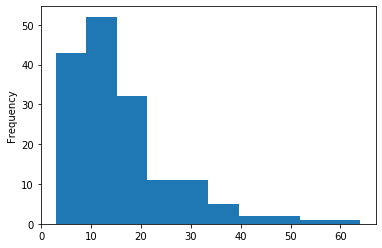

In [38]:
data[data['PURPOSE*'] == 'Meal/Entertain']['time_taken'].plot(kind = 'hist')

In [13]:
data.groupby(['CATEGORY*','PURPOSE*']).size()

CATEGORY*  PURPOSE*       
Business   Airport/Travel       3
           Between Offices     18
           Customer Visit     101
           Errand/Supplies    128
           Meal/Entertain     160
           Meeting            187
           Temporary Site      50
Personal   Charity ($)          1
           Commute              1
           Moving               4
dtype: int64

In [ ]:
## checking missing values in purpose
cab['PURPOSE'][(cab['TRIP'] =='ROUND TRIP') & (cab['CATEGORY'] =='BUSINESS')].isna().sum()  ##126/266 missing
cab['PURPOSE'][(cab['TRIP'] =='ONE WAY') & (cab['CATEGORY'] =='BUSINESS')].isna().sum() #305/811 missing
cab['PURPOSE'][(cab['TRIP'] =='ROUND TRIP') & (cab['CATEGORY'] =='PERSONAL')].isna().sum() ## 22/22 missing
cab['PURPOSE'][(cab[cab['TRIP'] =='ONE WAY') & (cab['CATEGORY'] =='PERSONAL')].isna().sum() ## 49/55 missing

In [16]:
data.groupby('CATEGORY*')['PURPOSE*'].count()

CATEGORY*
Business    647
Personal      6
Name: PURPOSE*, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
## Percentage of missing values
data.isnull().sum()/len(data)*100
# Purpose column - 43.46 % 


START_DATE*     0.000000
END_DATE*       0.000000
CATEGORY*       0.000000
START*          0.000000
STOP*           0.000000
MILES*          0.000000
PURPOSE*       43.463203
dtype: float64

In [7]:
## duplicate values
dup = data.loc[data.duplicated(keep = False)]
dup   ## Row no 491 and 492 has duplicate records

START_DATE*        END_DATE* CATEGORY*  START* STOP*  MILES* PURPOSE*
491  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary     9.9  Meeting
492  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary     9.9  Meeting

In [8]:
## Dropping duplicate rows
data.drop_duplicates(inplace = True)
data

#checking if all the duplicate values are removed or not
assert data.duplicated().sum() == 0

In [44]:
## Identifying features
object_features = data.select_dtypes(exclude = [np.number] )
print("Object features : {}".format(object_features.shape[1]))

numeric_features = data.select_dtypes(include = [np.number])
print("Numeric features : {}".format(numeric_features.shape[1]))


Object features : 6
Numeric features : 5


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   weekday      1155 non-null   int64         
 8   month        1155 non-null   int64         
 9   hour         1155 non-null   int64         
 10  time_taken   1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 99.4+ KB


In [49]:
(data.dtypes == 'O').sum()

4

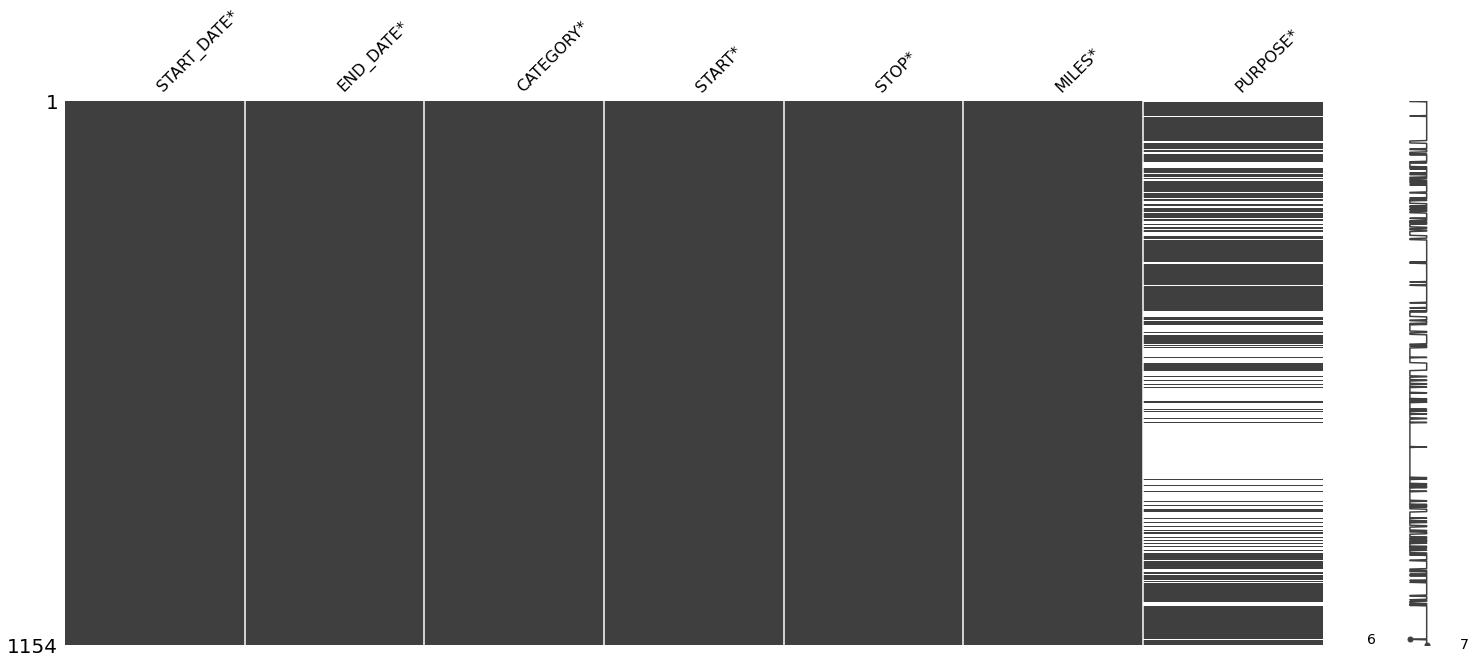

In [11]:
## Treatment of Nan values in purpose column
## visualizing the nan values column using heatmap to check if nan values follow any pattern trend or not
#data['PURPOSE*'].value_counts()
import missingno as msno
msno.matrix(data)

In [12]:
## separating the na values of purpose
na_data = data.loc[data['PURPOSE*'].isnull()]
na_data

START_DATE*         END_DATE* CATEGORY*  \
1        1/2/2016 1:25     1/2/2016 1:37  Business   
32      1/19/2016 9:09    1/19/2016 9:23  Business   
85      2/9/2016 10:54    2/9/2016 11:07  Personal   
86      2/9/2016 11:43    2/9/2016 11:50  Personal   
87      2/9/2016 13:36    2/9/2016 13:52  Personal   
88      2/9/2016 13:58    2/9/2016 14:02  Personal   
89      2/9/2016 18:55    2/9/2016 19:11  Business   
102    2/13/2016 23:45    2/14/2016 0:01  Personal   
103     2/14/2016 0:50    2/14/2016 1:00  Personal   
109     2/16/2016 8:29    2/16/2016 9:34  Business   
110    2/16/2016 10:31   2/16/2016 10:41  Business   
111    2/16/2016 11:32   2/16/2016 12:02  Business   
112    2/16/2016 12:39   2/16/2016 12:42  Business   
114    2/16/2016 16:34   2/16/2016 17:10  Business   
129    2/19/2016 11:20   2/19/2016 11:26  Personal   
130    2/19/2016 11:45   2/19/2016 11:50  Personal   
132    2/19/2016 16:26   2/19/2016 16:45  Business   
133    2/19/2016 17:09   2/19/2016 17:20  Business   
134    2/19/2016 20:08   2/19/2016 20:30  Personal   
135    2/19/2016 20:34   2/19/2016 20:51  Personal   
136     2/20/2016 7:59    2/20/2016 8:32  Personal   
137    2/20/2016 10:48   2/20/2016 10:56  Personal   
138    2/20/2016 11:45   2/20/2016 11:53  Personal   
139    2/20/2016 12:41   2/20/2016 13:17  Business   
141    2/20/2016 16:59   2/20/2016 17:54  Personal   
144     2/21/2016 9:07    2/21/2016 9:46  Business   
153    2/21/2016 16:04   2/21/2016 16:32  Business   
156    2/24/2016 14:30   2/24/2016 14:35  Business   
162     2/26/2016 9:06    2/26/2016 9:29  Business   
163    2/26/2016 11:05   2/26/2016 11:11  Personal   
166    2/26/2016 14:38   2/26/2016 14:46  Personal   
167    2/26/2016 15:00   2/26/2016 15:18  Personal   
168    2/26/2016 17:01   2/26/2016 17:12  Personal   
171    2/29/2016 11:07   2/29/2016 11:14  Personal   
174    2/29/2016 14:55   2/29/2016 15:03  Business   
178      3/3/2016 9:45     3/3/2016 9:52  Personal   
194     3/5/2016 12:57    3/5/2016 13:12  Personal   
195     3/5/2016 14:08    3/5/2016 14:18  Personal   
206     3/8/2016 16:13    3/8/2016 16:25  Personal   
209    3/10/2016 14:39   3/10/2016 14:55  Business   
210    3/10/2016 16:18   3/10/2016 16:28  Business   
212    3/11/2016 10:29   3/11/2016 10:36  Business   
213    3/11/2016 11:57   3/11/2016 12:04  Business   
214    3/11/2016 13:43   3/11/2016 13:51  Business   
215    3/11/2016 19:21   3/11/2016 19:35  Business   
216     3/12/2016 9:13    3/12/2016 9:22  Business   
217    3/12/2016 18:27   3/12/2016 18:37  Personal   
223    3/13/2016 22:19   3/13/2016 22:39  Business   
225    3/14/2016 18:39   3/14/2016 18:55  Business   
229    3/16/2016 14:44   3/16/2016 14:55  Business   
231     3/17/2016 0:33    3/17/2016 0:44  Personal   
235    3/17/2016 18:47   3/17/2016 19:09  Personal   
236    3/17/2016 20:57   3/17/2016 21:28  Personal   
237    3/17/2016 21:48   3/17/2016 22:04  Personal   
249    3/19/2016 17:52   3/19/2016 18:00  Business   
254    3/20/2016 17:08   3/20/2016 17:34  Business   
255    3/20/2016 18:34   3/20/2016 18:40  Personal   
257    3/21/2016 10:21   3/21/2016 10:26  Personal   
259    3/21/2016 18:59   3/21/2016 19:15  Business   
262    3/22/2016 12:06   3/22/2016 12:24  Personal   
263    3/22/2016 19:12   3/22/2016 19:25  Personal   
264    3/23/2016 14:37   3/23/2016 14:42  Personal   
265    3/23/2016 14:53   3/23/2016 14:59  Personal   
266    3/24/2016 19:47   3/24/2016 19:54  Personal   
267    3/24/2016 20:34   3/24/2016 20:40  Business   
271    3/26/2016 14:05   3/26/2016 14:29  Personal   
272    3/26/2016 15:19   3/26/2016 15:49  Personal   
273    3/26/2016 16:26   3/26/2016 16:30  Personal   
277    3/27/2016 21:26   3/27/2016 21:41  Personal   
278    3/27/2016 23:04   3/27/2016 23:18  Personal   
279    3/28/2016 12:29   3/28/2016 12:42  Personal   
280    3/28/2016 19:30   3/28/2016 20:23  Personal   
281    3/28/2016 22:55   3/28/2016 23:26  Personal   
282    3/29/201

In [13]:
np.round(na_data['CATEGORY*'].value_counts(normalize = True)*100,2)

# 74 % of Passengers with no purpose took ride on weekday
# 25% of passengers with no purpose took ride on weekend
# 85% Passengers travelling with missing purpose are mostly from business category and 14% from personal

Business    85.86
Personal    14.14
Name: CATEGORY*, dtype: float64

In [14]:
## filtering data with business category passengers
bus_data = data.loc[data['CATEGORY*'] == 'Business']
bus_data['PURPOSE*'].value_counts(normalize = True)*100

#We can see that most of the business passenger and travelling for the purpose of meeting 
# So replacing missing values of purpose with Meeting 

Meeting            28.792570
Meal/Entertain     24.767802
Errand/Supplies    19.814241
Customer Visit     15.634675
Temporary Site      7.739938
Between Offices     2.786378
Airport/Travel      0.464396
Name: PURPOSE*, dtype: float64

In [15]:
data['PURPOSE*'].fillna('Meeting',inplace = True)
assert data.isnull().sum().sum() == 0 ## chceking total missing values

In [16]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [17]:
## renaming columns - 

d = {'START_DATE*' : 'start_date',
      'END_DATE*'  :  'end_date',
    'CATEGORY*'    :   'category',
     'START*'      :  'start_journey',
     'STOP*'       :    'end_journey',
      'MILES*'     :     'miles',
     'PURPOSE*'    :      'purpose'}


data.rename(columns = d, inplace = True)
data

start_date          end_date  category  \
0       1/1/2016 21:11    1/1/2016 21:17  Business   
1        1/2/2016 1:25     1/2/2016 1:37  Business   
2       1/2/2016 20:25    1/2/2016 20:38  Business   
3       1/5/2016 17:31    1/5/2016 17:45  Business   
4       1/6/2016 14:42    1/6/2016 15:49  Business   
5       1/6/2016 17:15    1/6/2016 17:19  Business   
6       1/6/2016 17:30    1/6/2016 17:35  Business   
7       1/7/2016 13:27    1/7/2016 13:33  Business   
8       1/10/2016 8:05    1/10/2016 8:25  Business   
9      1/10/2016 12:17   1/10/2016 12:44  Business   
10     1/10/2016 15:08   1/10/2016 15:51  Business   
11     1/10/2016 18:18   1/10/2016 18:53  Business   
12     1/10/2016 19:12   1/10/2016 19:32  Business   
13      1/11/2016 8:55    1/11/2016 9:21  Business   
14     1/11/2016 11:56   1/11/2016 12:03  Business   
15     1/11/2016 13:32   1/11/2016 13:46  Business   
16     1/11/2016 14:30   1/11/2016 14:43  Business   
17     1/12/2016 12:33   1/12/2016 12:49  Business   
18     1/12/2016 12:53   1/12/2016 13:09  Business   
19     1/12/2016 14:42   1/12/2016 14:56  Business   
20     1/12/2016 15:13   1/12/2016 15:28  Business   
21     1/12/2016 15:42   1/12/2016 15:54  Business   
22     1/12/2016 16:02   1/12/2016 17:00  Business   
23     1/13/2016 13:54   1/13/2016 14:07  Business   
24     1/13/2016 15:00   1/13/2016 15:28  Business   
25     1/14/2016 16:29   1/14/2016 17:05  Business   
26     1/14/2016 21:39   1/14/2016 21:45  Business   
27      1/15/2016 0:41    1/15/2016 1:01  Business   
28     1/15/2016 11:43   1/15/2016 12:03  Business   
29     1/15/2016 13:26   1/15/2016 13:44  Business   
30     1/18/2016 14:55   1/18/2016 15:06  Business   
31     1/18/2016 16:13   1/18/2016 16:24  Business   
32      1/19/2016 9:09    1/19/2016 9:23  Business   
33     1/19/2016 10:55   1/19/2016 11:09  Business   
34     1/20/2016 10:36   1/20/2016 11:11  Business   
35     1/20/2016 11:48   1/20/2016 12:19  Business   
36     1/20/2016 13:25   1/20/2016 14:19  Business   
37     1/21/2016 14:25   1/21/2016 14:29  Business   
38     1/21/2016 14:43   1/21/2016 14:51  Business   
39     1/21/2016 16:01   1/21/2016 16:06  Business   
40     1/26/2016 10:41   1/26/2016 10:50  Business   
41     1/26/2016 12:33   1/26/2016 12:41  Business   
42     1/26/2016 16:24   1/26/2016 16:32  Business   
43     1/26/2016 17:17   1/26/2016 17:22  Business   
44     1/26/2016 17:27   1/26/2016 17:29  Business   
45      1/27/2016 9:24    1/27/2016 9:31  Business   
46     1/27/2016 10:19   1/27/2016 10:48  Business   
47     1/27/2016 12:34   1/27/2016 12:44  Business   
48     1/27/2016 14:05   1/27/2016 14:13  Business   
49     1/27/2016 14:46   1/27/2016 15:08  Business   
50     1/28/2016 12:28   1/28/2016 13:00  Business   
51     1/28/2016 15:11   1/28/2016 15:31  Business   
52     1/28/2016 16:21   1/28/2016 16:51  Business   
53      1/29/2016 9:31    1/29/2016 9:45  Business   
54     1/29/2016 10:56   1/29/2016 11:07  Business   
55     1/29/2016 11:43   1/29/2016 12:03  Business   
56     1/29/2016 13:24   1/29/2016 13:47  Business   
57     1/29/2016 18:31   1/29/2016 18:52  Business   
58     1/29/2016 21:21   1/29/2016 21:40  Business   
59     1/30/2016 16:21   1/30/2016 16:33  Business   
60     1/30/2016 18:09   1/30/2016 18:24  Business   
61      2/1/2016 10:35    2/1/2016 11:15  Business   
62      2/1/2016 12:10    2/1/2016 12:43  Business   
63      2/1/2016 12:56    2/1/2016 13:07  Business   
64      2/2/2016 13:04    2/2/2016 13:23  Business   
65      2/2/2016 13:51    2/2/2016 14:06  Business   
66      2/2/2016 14:38    2/2/2016 14:42  Business   
67       2/4/2016 8:40     2/4/2016 9:01  Business   
68       2/4/2016 9:37    2/4/2016 10:09  Business   
69      2/4/2016 10:26    2/4/2016 10:32  Business   
70      2/4/2016 15:59    2/4/2016 16:03  Business   
71      2/4/2016 16:35    2/4/2016 16:39  Business   
72      2/4/2016 18:04    2/4/2016 18:31  Business   
73      2/4/2016

In [18]:
## converting start_date and end_date to datetime

data.loc[:,['start_date','end_date']] = data.loc[:,['start_date','end_date']].apply(pd.to_datetime)

In [19]:
## Feature engg
from datetime import timedelta
data['total_duration'] = data['end_date'] - data['start_date']


## getting total_duration into minutes
data['total_duration'] =  data['total_duration']/timedelta(minutes=1)
data.head()

start_date            end_date  category start_journey  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business   Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business   Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business   Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business   Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business   Fort Pierce   

       end_journey  miles          purpose  total_duration  
0      Fort Pierce    5.1   Meal/Entertain             6.0  
1      Fort Pierce    5.0          Meeting            12.0  
2      Fort Pierce    4.8  Errand/Supplies            13.0  
3      Fort Pierce    4.7          Meeting            14.0  
4  West Palm Beach   63.7   Customer Visit            67.0

In [20]:
## extract time and date from datetime 

data['START_TIME'] = data['start_date'].dt.time
data['END_TIME'] = data['end_date'].dt.time
data['START_DATE'] = data['start_date'].dt.date
data['END_DATE'] = data['end_date'].dt.date

## dropping start date and end date 

data.drop(['start_date','end_date'],axis = 1, inplace = True)
data.head()


category start_journey      end_journey  miles          purpose  \
0  Business   Fort Pierce      Fort Pierce    5.1   Meal/Entertain   
1  Business   Fort Pierce      Fort Pierce    5.0          Meeting   
2  Business   Fort Pierce      Fort Pierce    4.8  Errand/Supplies   
3  Business   Fort Pierce      Fort Pierce    4.7          Meeting   
4  Business   Fort Pierce  West Palm Beach   63.7   Customer Visit   

   total_duration START_TIME  END_TIME  START_DATE    END_DATE  
0             6.0   21:11:00  21:17:00  2016-01-01  2016-01-01  
1            12.0   01:25:00  01:37:00  2016-01-02  2016-01-02  
2            13.0   20:25:00  20:38:00  2016-01-02  2016-01-02  
3            14.0   17:31:00  17:45:00  2016-01-05  2016-01-05  
4            67.0   14:42:00  15:49:00  2016-01-06  2016-01-06

In [21]:
## changing dtype of newly created columns

data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

## extracting hours from time

data['Start_hours'] =  pd.to_datetime(data['START_TIME'], format='%H:%M:%S').dt.hour
data['End_hours'] = pd.to_datetime(data['END_TIME'], format = '%H:%M:%S').dt.hour

#data['Start_Minutes'] = pd.to_datetime(data['Start_Time'], format = '%H:%M:%S').dt.minute
#data['End_Minutes'] = pd.to_datetime(data['End_Time'], format = '%H:%M:%S').dt.minute

data.head()



category start_journey      end_journey  miles          purpose  \
0  Business   Fort Pierce      Fort Pierce    5.1   Meal/Entertain   
1  Business   Fort Pierce      Fort Pierce    5.0          Meeting   
2  Business   Fort Pierce      Fort Pierce    4.8  Errand/Supplies   
3  Business   Fort Pierce      Fort Pierce    4.7          Meeting   
4  Business   Fort Pierce  West Palm Beach   63.7   Customer Visit   

   total_duration START_TIME  END_TIME START_DATE   END_DATE  Start_hours  \
0             6.0   21:11:00  21:17:00 2016-01-01 2016-01-01           21   
1            12.0   01:25:00  01:37:00 2016-01-02 2016-01-02            1   
2            13.0   20:25:00  20:38:00 2016-01-02 2016-01-02           20   
3            14.0   17:31:00  17:45:00 2016-01-05 2016-01-05           17   
4            67.0   14:42:00  15:49:00 2016-01-06 2016-01-06           14   

   End_hours  
0         21  
1          1  
2         20  
3         17  
4         15

In [22]:
## Generating some valuable info from datetime
bins = [0, 6, 12, 18, 24]
l = ['Night','Morning','Afternoon','Evening']
data = data.assign(Start_session=pd.cut(data['Start_hours'],bins,labels=l,include_lowest=True))
data = data.assign(End_session=pd.cut(data['End_hours'],bins,labels =l,include_lowest=True))

data


category               start_journey                 end_journey  miles  \
0     Business                 Fort Pierce                 Fort Pierce    5.1   
1     Business                 Fort Pierce                 Fort Pierce    5.0   
2     Business                 Fort Pierce                 Fort Pierce    4.8   
3     Business                 Fort Pierce                 Fort Pierce    4.7   
4     Business                 Fort Pierce             West Palm Beach   63.7   
5     Business             West Palm Beach             West Palm Beach    4.3   
6     Business             West Palm Beach                  Palm Beach    7.1   
7     Business                        Cary                        Cary    0.8   
8     Business                        Cary                 Morrisville    8.3   
9     Business                     Jamaica                    New York   16.5   
10    Business                    New York                      Queens   10.8   
11    Business                    Elmhurst                    New York    7.5   
12    Business                     Midtown                 East Harlem    6.2   
13    Business                 East Harlem                       NoMad    6.4   
14    Business           Flatiron District                     Midtown    1.6   
15    Business                     Midtown                Midtown East    1.7   
16    Business                Midtown East                     Midtown    1.9   
17    Business                     Midtown               Hudson Square    1.9   
18    Business               Hudson Square             Lower Manhattan    4.0   
19    Business             Lower Manhattan               Hudson Square    1.8   
20    Business               Hudson Square              Hell's Kitchen    2.4   
21    Business              Hell's Kitchen                     Midtown    2.0   
22    Business                    New York               Queens County   15.1   
23    Business                    Downtown                     Gulfton   11.2   
24    Business                     Gulfton                    Downtown   11.8   
25    Business                     Houston                     Houston   21.9   
26    Business                  Eagan Park             Jamestown Court    3.9   
27    Business                 Morrisville                        Cary    8.0   
28    Business                        Cary                      Durham   10.4   
29    Business                      Durham                        Cary   10.4   
30    Business                        Cary                        Cary    4.8   
31    Business            Farmington Woods                 Whitebridge    4.7   
32    Business                 Whitebridge         Lake Wellingborough    7.2   
33    Business         Lake Wellingborough                 Whitebridge    7.6   
34    Business                        Cary                     Raleigh   17.1   
35    Business         Fayetteville Street                     Umstead   15.1   
36    Business                     Raleigh                        Cary   40.2   
37    Business                        Cary                        Cary    1.6   
38    Business                        Cary                        Cary    2.4   
39    Business                        Cary                        Cary    1.0   
40    Business                 Whitebridge                   Hazelwood    2.0   
41    Business                   Hazelwood                 Whitebridge    2.3   
42    Business                 Whitebridge              Westpark Place    1.9   
43    Business                        Cary                        Cary    1.4   
44    Business                        Cary                        Cary    0.5   
45    Business                        Cary                        Cary    1.8   
46    Business                        Cary                     Raleigh   18.7   
47    Business                    Fairmont             Meredith Townes    3.4   
48    Business                     Ra

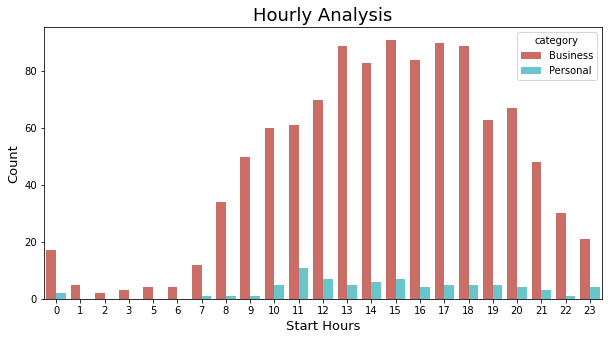

In [29]:
## Visualizing starting hours

plt.figure(figsize = (10,5))
sns.countplot(x = 'Start_hours', hue = 'category', data = data, palette = 'hls')
plt.title("Hourly Analysis", size = 18)
plt.xlabel("Start Hours", size = 13)
plt.ylabel('Count', size = 13)
plt.show()

## Max rides are taken from 8 am to 10pm

## No rides for passengers with personal category between 1am to 6am
## Max rides for passengers with personal category taken on 11am

## Max rides for passengers with business category taken on 3pm



In [ ]:
data.dtypes

In [53]:
## Day difference


data["No_of_days"] = data['END_DATE'] - data['START_DATE']
data

## dropping this column is of no use as all the passengers travelled on the same day
data.drop('No_of_days',axis =1, inplace = True)



#splitting hours minutes and seconds from duration and creating respective variables using assign-

# Time in minutes 
#Time in minutes 

                   

#Hour
#data = data.assign(Hour = [(x.seconds)/(60.0*60.0) for x in data['Duration']] )

# Time in seconds
#data = data.assign(Seconds = [x.seconds * 1.0 for x in data['Duration']] )                   



#syntax---
#pandas.to_timedelta(arg, unit='ns', errors='raise')
#errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
#-> If ‘raise’, then invalid parsing will raise an exception
#-> If ‘coerce’, then invalid parsing will be set as NaN
#-> If ‘ignore’, then invalid parsing will return the input


## Calculating total days of journey--
#converting start_date and end_date into datetime dtypes

#data['No_of_days'] = data['End_Date'] - data['Start_Date']


##calculating difference in terms of days

#data['No_of_Days'] = data['No_of_Days']/np.timedelta64(1,'D')
#np.divide(data['Duration'], np.timedelta64(1, 's'))



In [ ]:
data.dtypes

In [ ]:
# Converting seconds to minutes

#data['Time_in_seconds'] = data['Time_in_seconds']/60
#data

In [54]:
from datetime import datetime

In [55]:
data['month'] = pd.DatetimeIndex(data['START_DATE']).month
data['year'] = pd.DatetimeIndex(data['START_DATE']).year
data['week'] = pd.DatetimeIndex(data['START_DATE']).weekday
data

category               start_journey                 end_journey  miles  \
0     Business                 Fort Pierce                 Fort Pierce    5.1   
1     Business                 Fort Pierce                 Fort Pierce    5.0   
2     Business                 Fort Pierce                 Fort Pierce    4.8   
3     Business                 Fort Pierce                 Fort Pierce    4.7   
4     Business                 Fort Pierce             West Palm Beach   63.7   
5     Business             West Palm Beach             West Palm Beach    4.3   
6     Business             West Palm Beach                  Palm Beach    7.1   
7     Business                        Cary                        Cary    0.8   
8     Business                        Cary                 Morrisville    8.3   
9     Business                     Jamaica                    New York   16.5   
10    Business                    New York                      Queens   10.8   
11    Business                    Elmhurst                    New York    7.5   
12    Business                     Midtown                 East Harlem    6.2   
13    Business                 East Harlem                       NoMad    6.4   
14    Business           Flatiron District                     Midtown    1.6   
15    Business                     Midtown                Midtown East    1.7   
16    Business                Midtown East                     Midtown    1.9   
17    Business                     Midtown               Hudson Square    1.9   
18    Business               Hudson Square             Lower Manhattan    4.0   
19    Business             Lower Manhattan               Hudson Square    1.8   
20    Business               Hudson Square              Hell's Kitchen    2.4   
21    Business              Hell's Kitchen                     Midtown    2.0   
22    Business                    New York               Queens County   15.1   
23    Business                    Downtown                     Gulfton   11.2   
24    Business                     Gulfton                    Downtown   11.8   
25    Business                     Houston                     Houston   21.9   
26    Business                  Eagan Park             Jamestown Court    3.9   
27    Business                 Morrisville                        Cary    8.0   
28    Business                        Cary                      Durham   10.4   
29    Business                      Durham                        Cary   10.4   
30    Business                        Cary                        Cary    4.8   
31    Business            Farmington Woods                 Whitebridge    4.7   
32    Business                 Whitebridge         Lake Wellingborough    7.2   
33    Business         Lake Wellingborough                 Whitebridge    7.6   
34    Business                        Cary                     Raleigh   17.1   
35    Business         Fayetteville Street                     Umstead   15.1   
36    Business                     Raleigh                        Cary   40.2   
37    Business                        Cary                        Cary    1.6   
38    Business                        Cary                        Cary    2.4   
39    Business                        Cary                        Cary    1.0   
40    Business                 Whitebridge                   Hazelwood    2.0   
41    Business                   Hazelwood                 Whitebridge    2.3   
42    Business                 Whitebridge              Westpark Place    1.9   
43    Business                        Cary                        Cary    1.4   
44    Business                        Cary                        Cary    0.5   
45    Business                        Cary                        Cary    1.8   
46    Business                        Cary                     Raleigh   18.7   
47    Business                    Fairmont             Meredith Townes    3.4   
48    Business                     Ra

In [56]:
#making week and weekend 
#0- sun, 1 - mon, 2 - tues, 3 - wed, 4 - thurs, 5- friday
data = data.assign(week = ["weekday" if x < 5 else 'weekend' for x in data['week']])
data

category               start_journey                 end_journey  miles  \
0     Business                 Fort Pierce                 Fort Pierce    5.1   
1     Business                 Fort Pierce                 Fort Pierce    5.0   
2     Business                 Fort Pierce                 Fort Pierce    4.8   
3     Business                 Fort Pierce                 Fort Pierce    4.7   
4     Business                 Fort Pierce             West Palm Beach   63.7   
5     Business             West Palm Beach             West Palm Beach    4.3   
6     Business             West Palm Beach                  Palm Beach    7.1   
7     Business                        Cary                        Cary    0.8   
8     Business                        Cary                 Morrisville    8.3   
9     Business                     Jamaica                    New York   16.5   
10    Business                    New York                      Queens   10.8   
11    Business                    Elmhurst                    New York    7.5   
12    Business                     Midtown                 East Harlem    6.2   
13    Business                 East Harlem                       NoMad    6.4   
14    Business           Flatiron District                     Midtown    1.6   
15    Business                     Midtown                Midtown East    1.7   
16    Business                Midtown East                     Midtown    1.9   
17    Business                     Midtown               Hudson Square    1.9   
18    Business               Hudson Square             Lower Manhattan    4.0   
19    Business             Lower Manhattan               Hudson Square    1.8   
20    Business               Hudson Square              Hell's Kitchen    2.4   
21    Business              Hell's Kitchen                     Midtown    2.0   
22    Business                    New York               Queens County   15.1   
23    Business                    Downtown                     Gulfton   11.2   
24    Business                     Gulfton                    Downtown   11.8   
25    Business                     Houston                     Houston   21.9   
26    Business                  Eagan Park             Jamestown Court    3.9   
27    Business                 Morrisville                        Cary    8.0   
28    Business                        Cary                      Durham   10.4   
29    Business                      Durham                        Cary   10.4   
30    Business                        Cary                        Cary    4.8   
31    Business            Farmington Woods                 Whitebridge    4.7   
32    Business                 Whitebridge         Lake Wellingborough    7.2   
33    Business         Lake Wellingborough                 Whitebridge    7.6   
34    Business                        Cary                     Raleigh   17.1   
35    Business         Fayetteville Street                     Umstead   15.1   
36    Business                     Raleigh                        Cary   40.2   
37    Business                        Cary                        Cary    1.6   
38    Business                        Cary                        Cary    2.4   
39    Business                        Cary                        Cary    1.0   
40    Business                 Whitebridge                   Hazelwood    2.0   
41    Business                   Hazelwood                 Whitebridge    2.3   
42    Business                 Whitebridge              Westpark Place    1.9   
43    Business                        Cary                        Cary    1.4   
44    Business                        Cary                        Cary    0.5   
45    Business                        Cary                        Cary    1.8   
46    Business                        Cary                     Raleigh   18.7   
47    Business                    Fairmont             Meredith Townes    3.4   
48    Business                     Ra

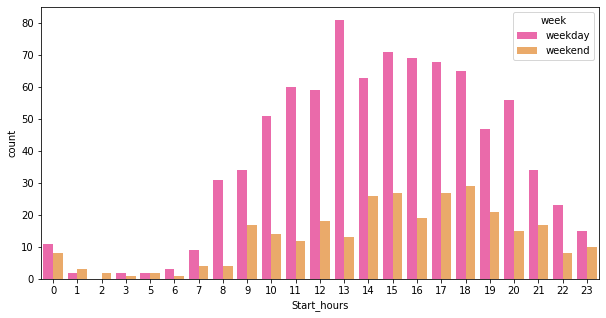

In [59]:
plt.figure(figsize = (10,5))
sns.countplot('Start_hours',hue = 'week',data = data, palette = 'spring')

## Max rides on weekends are between 2pm to 6pm

## Max rides on weekdays is at 1pm but mostly revolve around 10am to 6pm

## All the rides at 2am is on the weekends not for the weekdays

<Figure size 720x360 with 0 Axes>

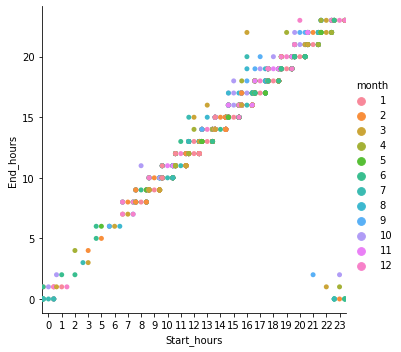

In [75]:
plt.figure(figsize = (10,5))
sns.catplot(x = 'Start_hours', y = 'End_hours', hue = 'month', kind = 'swarm', data = data)

## Rides are comparatively less for the december month starting from 2 am to 7am




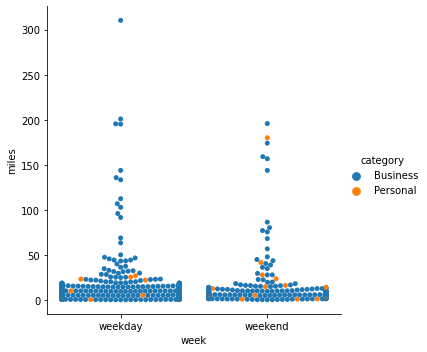

In [77]:
sns.catplot(x="week", y="miles", hue="category", kind="swarm", data=data)

## Max miles travelled on weekday by a business category passenger
## Max passengers from category personal travelled on weekend

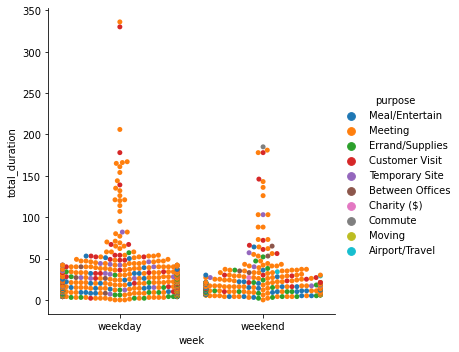

In [79]:
sns.catplot(x="week", y="total_duration", hue="purpose", kind="swarm", data=data)

##  Max duration spend by the passenger for the purpose of meeting and customer visit on the regular weekdays
## Max duration spend by the passenger for the purpose of commute on the weekends


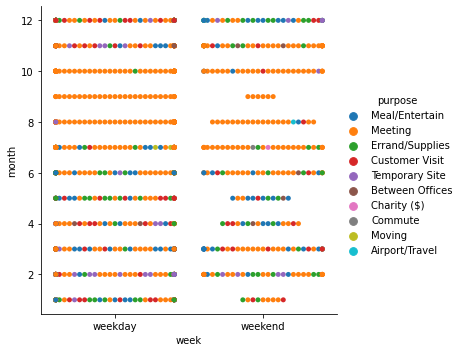

In [80]:
sns.catplot(x="week", y="month", hue="purpose", kind="swarm", data=data)

## In the month of jan and sept, very less no of passengers travelled during weekend
## All the passengers travelled in the sept are for the purpose of meeting

## In the month of december, no passenger travlled for the purpose of office,charity or commute


In [81]:
## dropping strt_ hours and end _hours
data.drop(['Start_hours','End_hours'], axis = 1, inplace = True)
data.head()

category start_journey      end_journey  miles          purpose  \
0  Business   Fort Pierce      Fort Pierce    5.1   Meal/Entertain   
1  Business   Fort Pierce      Fort Pierce    5.0          Meeting   
2  Business   Fort Pierce      Fort Pierce    4.8  Errand/Supplies   
3  Business   Fort Pierce      Fort Pierce    4.7          Meeting   
4  Business   Fort Pierce  West Palm Beach   63.7   Customer Visit   

   total_duration START_TIME  END_TIME START_DATE   END_DATE Start_session  \
0             6.0   21:11:00  21:17:00 2016-01-01 2016-01-01       Evening   
1            12.0   01:25:00  01:37:00 2016-01-02 2016-01-02         Night   
2            13.0   20:25:00  20:38:00 2016-01-02 2016-01-02       Evening   
3            14.0   17:31:00  17:45:00 2016-01-05 2016-01-05     Afternoon   
4            67.0   14:42:00  15:49:00 2016-01-06 2016-01-06     Afternoon   

  End_session  month  year     week  
0     Evening      1  2016  weekday  
1       Night      1  2016  weekend  
2     Evening      1  2016  weekend  
3   Afternoon      1  2016  weekday  
4   Afternoon      1  2016  weekday

In [82]:
## Removing some columns
## All the passenger travlled in the same year 2016
data.drop(['START_TIME','START_DATE','END_TIME','END_DATE','year'], axis = 1, inplace = True)
data.head()

category start_journey      end_journey  miles          purpose  \
0  Business   Fort Pierce      Fort Pierce    5.1   Meal/Entertain   
1  Business   Fort Pierce      Fort Pierce    5.0          Meeting   
2  Business   Fort Pierce      Fort Pierce    4.8  Errand/Supplies   
3  Business   Fort Pierce      Fort Pierce    4.7          Meeting   
4  Business   Fort Pierce  West Palm Beach   63.7   Customer Visit   

   total_duration Start_session End_session  month     week  
0             6.0       Evening     Evening      1  weekday  
1            12.0         Night       Night      1  weekend  
2            13.0       Evening     Evening      1  weekend  
3            14.0     Afternoon   Afternoon      1  weekday  
4            67.0     Afternoon   Afternoon      1  weekday

In [83]:
## Removing unnecessary spaces from the string and converting to upper case

obj_col = ['category','start_journey','end_journey','purpose','Start_session','End_session','week']


data.loc[:,obj_col] = data.loc[:,obj_col].apply(lambda x : x.str.upper())
data.loc[:,obj_col] = data.loc[:,obj_col].apply(lambda x : x.str.strip())

data.head()

category start_journey      end_journey  miles          purpose  \
0  BUSINESS   FORT PIERCE      FORT PIERCE    5.1   MEAL/ENTERTAIN   
1  BUSINESS   FORT PIERCE      FORT PIERCE    5.0          MEETING   
2  BUSINESS   FORT PIERCE      FORT PIERCE    4.8  ERRAND/SUPPLIES   
3  BUSINESS   FORT PIERCE      FORT PIERCE    4.7          MEETING   
4  BUSINESS   FORT PIERCE  WEST PALM BEACH   63.7   CUSTOMER VISIT   

   total_duration Start_session End_session  month     week  
0             6.0       EVENING     EVENING      1  WEEKDAY  
1            12.0         NIGHT       NIGHT      1  WEEKEND  
2            13.0       EVENING     EVENING      1  WEEKEND  
3            14.0     AFTERNOON   AFTERNOON      1  WEEKDAY  
4            67.0     AFTERNOON   AFTERNOON      1  WEEKDAY

In [87]:
## Filter the passengers whoes start journey and end journey is same - 
## Out of 1154, 288 passengers whoes start and end destination is same took ride i.e. 24.95%


same_dest = data[data['start_journey'] == data['end_journey']]
same_dest.shape

## calculating value counts for the columns in same_dest

def col_value_counts(data):
    for i in data.iloc[:,[0,4,6,7]]:
        print(i,"/n",data[i].value_counts())
        
    
col_value_counts(same_dest)
    
## Passengers with both start and end route same are mostly from business category 
## and purpose of travelling is mainly for meetings

## Passengers with both and start and end route travelled mostly on december weekdays





category /n BUSINESS    266
PERSONAL     22
Name: category, dtype: int64
purpose /n MEETING            179
ERRAND/SUPPLIES     51
MEAL/ENTERTAIN      28
CUSTOMER VISIT      14
TEMPORARY SITE      11
AIRPORT/TRAVEL       3
BETWEEN OFFICES      2
Name: purpose, dtype: int64
Start_session /n AFTERNOON    148
MORNING       81
EVENING       53
NIGHT          6
Name: Start_session, dtype: int64
End_session /n AFTERNOON    141
MORNING       78
EVENING       62
NIGHT          7
Name: End_session, dtype: int64


In [88]:
## creating new column for residents 

## local and non_local residents

data['residents'] = np.where(data['start_journey'] == data['end_journey'], 'LOCAL','NON-LOCAL')
data.head()

category start_journey      end_journey  miles          purpose  \
0  BUSINESS   FORT PIERCE      FORT PIERCE    5.1   MEAL/ENTERTAIN   
1  BUSINESS   FORT PIERCE      FORT PIERCE    5.0          MEETING   
2  BUSINESS   FORT PIERCE      FORT PIERCE    4.8  ERRAND/SUPPLIES   
3  BUSINESS   FORT PIERCE      FORT PIERCE    4.7          MEETING   
4  BUSINESS   FORT PIERCE  WEST PALM BEACH   63.7   CUSTOMER VISIT   

   total_duration Start_session End_session  month     week  residents  
0             6.0       EVENING     EVENING      1  WEEKDAY      LOCAL  
1            12.0         NIGHT       NIGHT      1  WEEKEND      LOCAL  
2            13.0       EVENING     EVENING      1  WEEKEND      LOCAL  
3            14.0     AFTERNOON   AFTERNOON      1  WEEKDAY      LOCAL  
4            67.0     AFTERNOON   AFTERNOON      1  WEEKDAY  NON-LOCAL

In [89]:
data.groupby('residents')[['miles','total_duration']].sum()

## Max miles and duration travelled by the non- local residents 


miles  total_duration
residents                        
LOCAL      2229.8          6020.0
NON-LOCAL  9965.0         20801.0

AFTERNOON    554
MORNING      279
EVENING      270
NIGHT         51
Name: End_session, dtype: int64

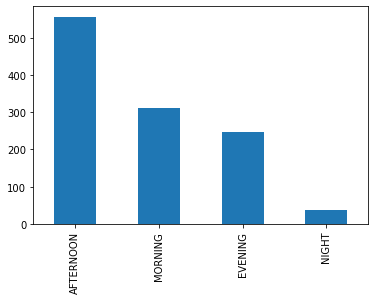

In [92]:
data['Start_session'].value_counts().plot(kind = 'bar')

## Max sessions started in afternoon

data['End_session'].value_counts()

## Max sessions ended also in afternoon
###-----------------------------------------------------------------------------------------------------------##########

In [ ]:
## Label encoding --------------------------
## catgeory column -  1- business
                    # 0 - Personal

data.loc[:,'category'] = data['category'].replace({'BUSINESS' : 1, 'PERSONAL' : 0})

## Week
# 1 - weekday
# 0 - weekend

data.loc[:,'week'] = data['week'].replace({'WEEKDAY' :  1,'WEEKEND' : 0})

#residents - 
#1 - local
#0 - non - local

data.loc[:,'residents'] = data['residents'].replace({'LOCAL' : 1, 'NON-LOCAL' : 0})



In [ ]:
sns.heatmap(data.corr(), annot = True, fmt = '0.3f')

## Total_Duration and Miles are highly correlated to each other 
## Month and miles are negatively correlated



In [ ]:
num_features = data.select_dtypes(include = [np.number])
for i, col in enumerate(num_features):
    print(i,col)

In [ ]:
def checking_outliers(data):
    num_features = data.select_dtypes(include = [np.number])
    for i,col in enumerate(num_features):
        plt.figure(figsize = (20,5))
        plt.subplot(1,num_features.shape[1],i+1)
        sns.boxplot(num_features[col], palette = 'BuGn')
        plt.title(col)
        plt.show()

In [ ]:
checking_outliers(data) ## Miles and Duration has outliers 

In [ ]:
## Treating outliers
def Outlier(data):
    for column in data.columns:
        if data[column].dtype == 'float64':
            Q1 = np.percentile(data[column].values,25)
            Q3 = np.percentile(data[column].values,75)
            IQR = Q3 - Q1
            lower = Q1 - (1.5 * IQR)
            upper = Q3 + (1.5 * IQR)
            data.loc[:,column] = np.where(data[column].values > upper, upper,data[column].values)
            data.loc[:,column] = np.where(data[column].values < lower, lower,data[column].values)
    
    return data
                
        
Outlier(data)

      
    
   

    

In [ ]:
checking_outliers(data)




In [ ]:
## dist plots for numeric features

def dist_num_plots(data):
    num_features = data.select_dtypes(include = [np.number])
    for i,col in enumerate(num_features):
        plt.figure(figsize = (20,5))
        plt.subplot(1,num_features.shape[1],i+1)
        sns.distplot(num_features[col], color = 'saddlebrown', kde = False, hist_kws=dict(alpha=0.8,edgecolor="black",linewidth=2,align = 'mid'))
        plt.tight_layout()
        plt.grid(True)
        plt.title(col, size = 13)
       


        
        

In [ ]:
dist_num_plots(data)

## Distribution of miles is mostly same as distribution for total_duration
## max no of passengers travlled between the duration of 10-30mins


In [ ]:
##convert some columns to category --- 

col = ['category','purpose','Start_session','End_session','month','week','residents']
data.loc[:,col] = data.loc[:,col].astype('category')
data.dtypes

In [ ]:
## count plot for categorical data
def cat_plots(data):
    cat_features = data.select_dtypes(exclude = [np.number])
    for i,col in enumerate(cat_features.loc[:,['category','purpose','Start_session','End_session','month','week']]):
        plt.figure(figsize = (20,5))
        plt.subplot(1,cat_features.shape[1],i+1)
        sns.countplot(y = cat_features[col], palette = 'colorblind')
        plt.title(col)
        plt.tight_layout()
        plt.show()

In [ ]:
cat_plots(data)
# Business Passengers have max rides for the purpose of meeting on a weekdays

## Max rides on december month

In [ ]:
data.dtypes

In [ ]:
## Miles travel on weekend and weekdays

data.groupby('week')['miles'].sum().plot(kind = "bar",color = 'teal');
plt.title("Total Miles Travlled on the following days", size = 15)
plt.xlabel('Week', size = 12)
plt.ylabel('Miles', size = 12)
plt.show()

#Max miles travelled by passengers on weekday rather than on weekend

In [ ]:
## Week, miles, category
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'week', y = 'miles', hue = 'category', data = data, palette = "cubehelix")
plt.xlabel('Week', size = 12)
plt.ylabel('Miles', size = 12)
plt.title("Miles Travelled (Week and Category Wise)", size = 16)
plt.show()


## Passengers with category personal travelled maximum miles on weekends than weekdays
## Passengers with category Business travelled also travelled slightly less miles on weekdays than weekend

In [ ]:
data.groupby(['purpose','category']).agg('count').plot(kind = 'bar');
plt.title('Purpose and Category Wise')
plt.xlabel('Purpose/Category')
plt.ylabel('Count')
plt.show()

## No Passenger with category personal travelled for the purpose of Airport,between offices,customer visit,Errand/Supplies,Meal/Entertain
## and temporary site

## No passenger with category business travelled for the purpose of charity,commute and moving

## Max no of passengers from category personal travlled to meeting
## Max no of passengers from category business travelled to meeting



In [ ]:
## Plotting total_ duration and miles and week
fig = plt.figure(figsize = (8,8))
sns.set_style('whitegrid')
sns.scatterplot('miles','total_duration',hue = 'week',data = data,palette = 'gnuplot_r') 
plt.title("Miles vs Total Duration on different day",size = 18)
plt.xlabel('Miles', size = 13)
plt.ylabel('Total_Duration', size = 13)
plt.show()

## Max total duration is for 5hrs 30 min or 5 hours 25 min of journey by passenger is on week day 
## Max passengers travelled on weekday
## 

In [ ]:
## Plotting total_ duration and miles and category
fig = plt.figure(figsize = (8,8))
sns.set_style('whitegrid')
sns.scatterplot('miles','total_duration',hue = 'category',data = data,palette = 'mako') 
plt.title("Miles vs Total Duration by Different Passengers", size = 18)
plt.xlabel('Miles', size = 13)
plt.ylabel('Total_Duration', size = 13)
plt.show()

## Max time taken by passenger belonging to business category - 5hrs 30 min or 5 hours 25 min
## Max miles covered - 300

In [ ]:
data['purpose'] = data['purpose'].astype('category')

In [ ]:
data.groupby(['purpose','category'])['miles'].sum().plot(kind = "bar",color = 'saddlebrown')

In [ ]:
##Purpose
#Most business passengers are travelling for the purpose of Meeting
sns.countplot(y ='purpose', hue = "category", data = data, orient = 'h', palette = 'Accent')

In [ ]:
data.groupby('month')['total_duration','miles'].sum().plot(kind = 'bar')
plt.xlabel('Month', size = 13)
plt.ylabel('Total_Duration',size = 13)
plt.title('Month wise Duration and Miles',size = 18)
plt.show()


## Max duration taken by passengers is on August month 

## Min duration and miles by passengers is on May month

## Max duration and miles taken by passengers is on October Month

In [ ]:
## Miles, Total_Duration, Purpose
fig = plt.figure(figsize = (8,8))
sns.set_style('whitegrid')
sns.scatterplot('miles','total_duration',hue = 'purpose',data = data,palette = 'CMRmap_r') 
plt.title("Miles vs Total Duration for Different Purpose", size = 18)
plt.xlabel('Miles', size = 13)
plt.ylabel('Total_Duration', size = 13)
plt.show()


## Max miles and duration taken by the passengers who travelled for the purpose of Meeting and Customer Visit

In [ ]:
## conversion
data.dtypes

col = ['category','purpose','Start_session','End_session','month','week','residents']
data.loc[:,col] = data.loc[:,col].astype('object')

In [ ]:
sns.pairplot(data, palette = 'twilight_shifted_r')

##  travelled by passengers with personal category

